#Installing dependencies / Libraries


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # plotting
import seaborn as sns # more plotting
import xgboost as xgb # common ML model
from sklearn.model_selection import train_test_split # ML utilities
from sklearn.linear_model import LogisticRegression # another common ML model
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score# more ML utilities
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/dataset/audio_dataset.xlsx'

#Reading data

In [ ]:
data = pd.read_excel(file_path)

In [ ]:
print(data.columns)
len(data.columns)

Index(['Label', 'File Size (KB)', 'Spectral Centroid Mean',
       'Spectral Bandwidth Mean', 'RMS Mean', 'Zero-Crossing Rate Mean',
       'Spectral Contrast Mean', 'Pitch Mean', 'Pitch Confidence Mean',
       'Mel Spectrogram Mean', 'Mel Spectrogram Variance', 'Energy Mean',
       'Speech rate'],
      dtype='object')


13

#Normalizing data

In [ ]:
X = data.drop(columns='Label')
y = data['Label']

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df["Label"] = y

data = X_scaled_df

data.head()

,File Size (KB),Spectral Centroid Mean,Spectral Bandwidth Mean,RMS Mean,Zero-Crossing Rate Mean,Spectral Contrast Mean,Pitch Mean,Pitch Confidence Mean,Mel Spectrogram Mean,Mel Spectrogram Variance,Energy Mean,Speech rate,Label
0,-0.839561,-0.238607,0.190651,0.094357,0.069426,2.048901,-1.014785,-0.159249,-0.007532,-0.368099,0.094357,0.063196,F_AI
1,-0.856980,-0.065436,0.181196,0.788903,0.073463,2.334293,-1.608152,0.609294,1.221874,1.336845,0.788903,0.237610,F_AI
2,-0.758710,1.279133,0.654165,0.231637,1.366303,1.520763,-0.220824,0.132183,0.125154,-0.347519,0.231637,-2.720242,F_AI
3,-0.797851,0.783195,0.265936,0.971734,2.097872,1.626184,1.904922,0.616820,1.276433,0.921564,0.971734,0.660161,F_AI
4,-0.827832,-0.292962,0.160127,0.072248,-0.286749,1.777547,-0.572135,-0.316149,0.053390,0.146302,0.072248,0.063196,F_AI


In [ ]:
cleaned_data = data.dropna()
data = cleaned_data
has_null = data.isnull().any().any()
print(has_null)

False


#Visualization of dataset & PCA


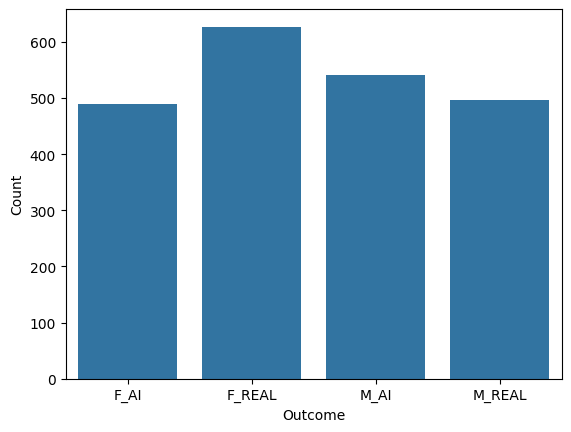

In [ ]:
sns.countplot(data=data, x="Label")
plt.ylabel("Count")
plt.xlabel("Outcome")
plt.show()

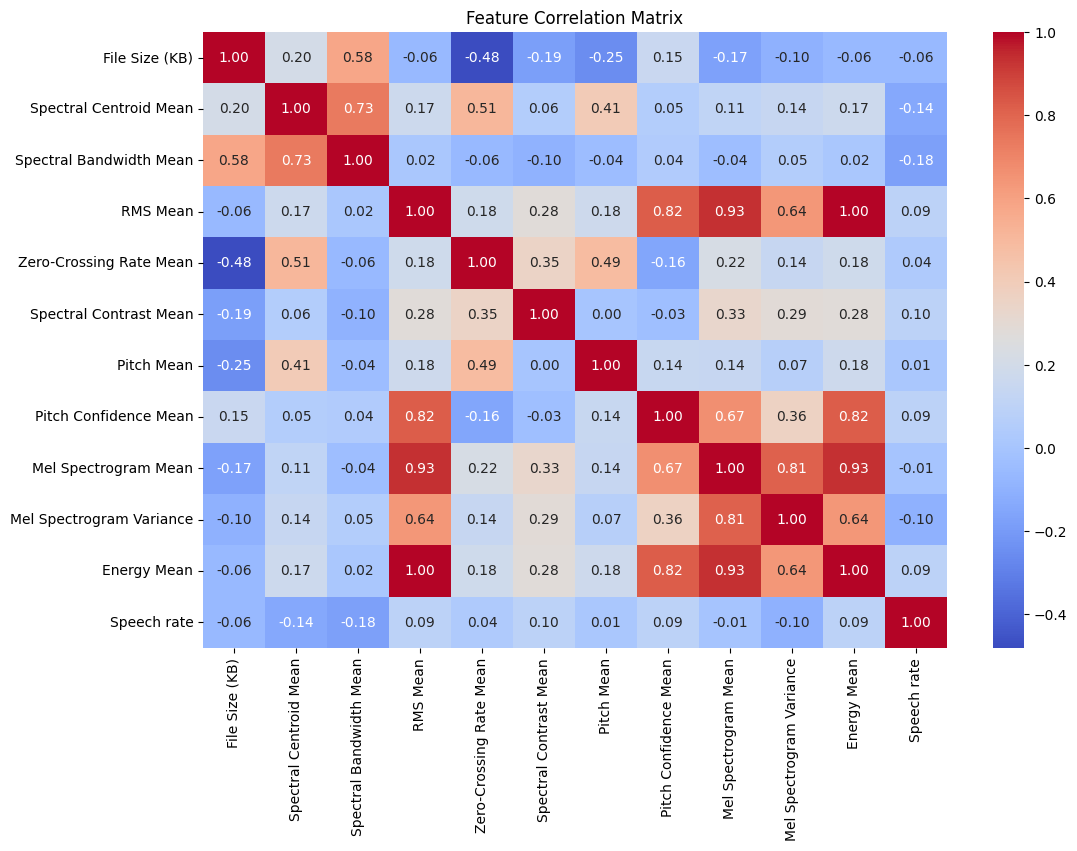

In [ ]:
correlation = data.drop(columns='Label').corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()

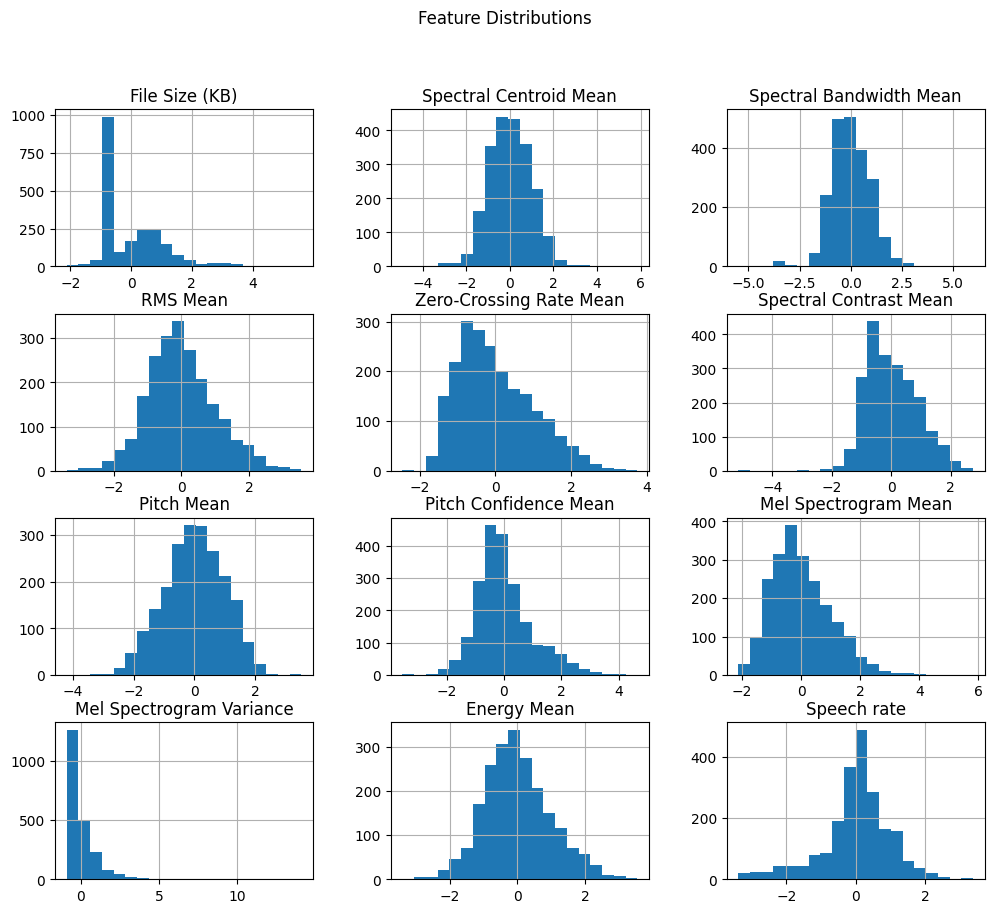

In [ ]:
data.drop(columns='Label').hist(bins=20, figsize=(12, 10))
plt.suptitle("Feature Distributions")
plt.show()

Scree Plot


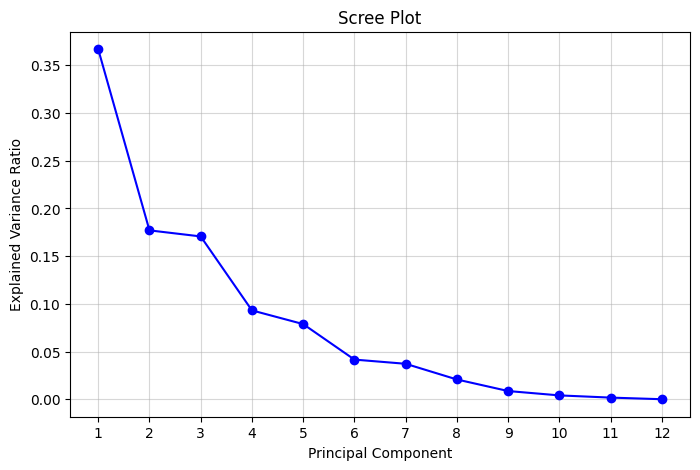


Cummulative Variance of each PC: - [0.3668515  0.54383875 0.71447174 0.8075838  0.88633803 0.92787898
 0.96501781 0.98571965 0.99429737 0.99830061 1.         1.        ]


In [ ]:
X = data.drop(columns='Label') #features
pca = PCA()
X_pca = pca.fit_transform(X)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

#scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', color='b')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))  # Ensure PC indices are shown
plt.grid(alpha=0.5)
plt.show()

cumulative_variance = pca.explained_variance_ratio_.cumsum()
print("\nCummulative Variance of each PC: -",cumulative_variance)


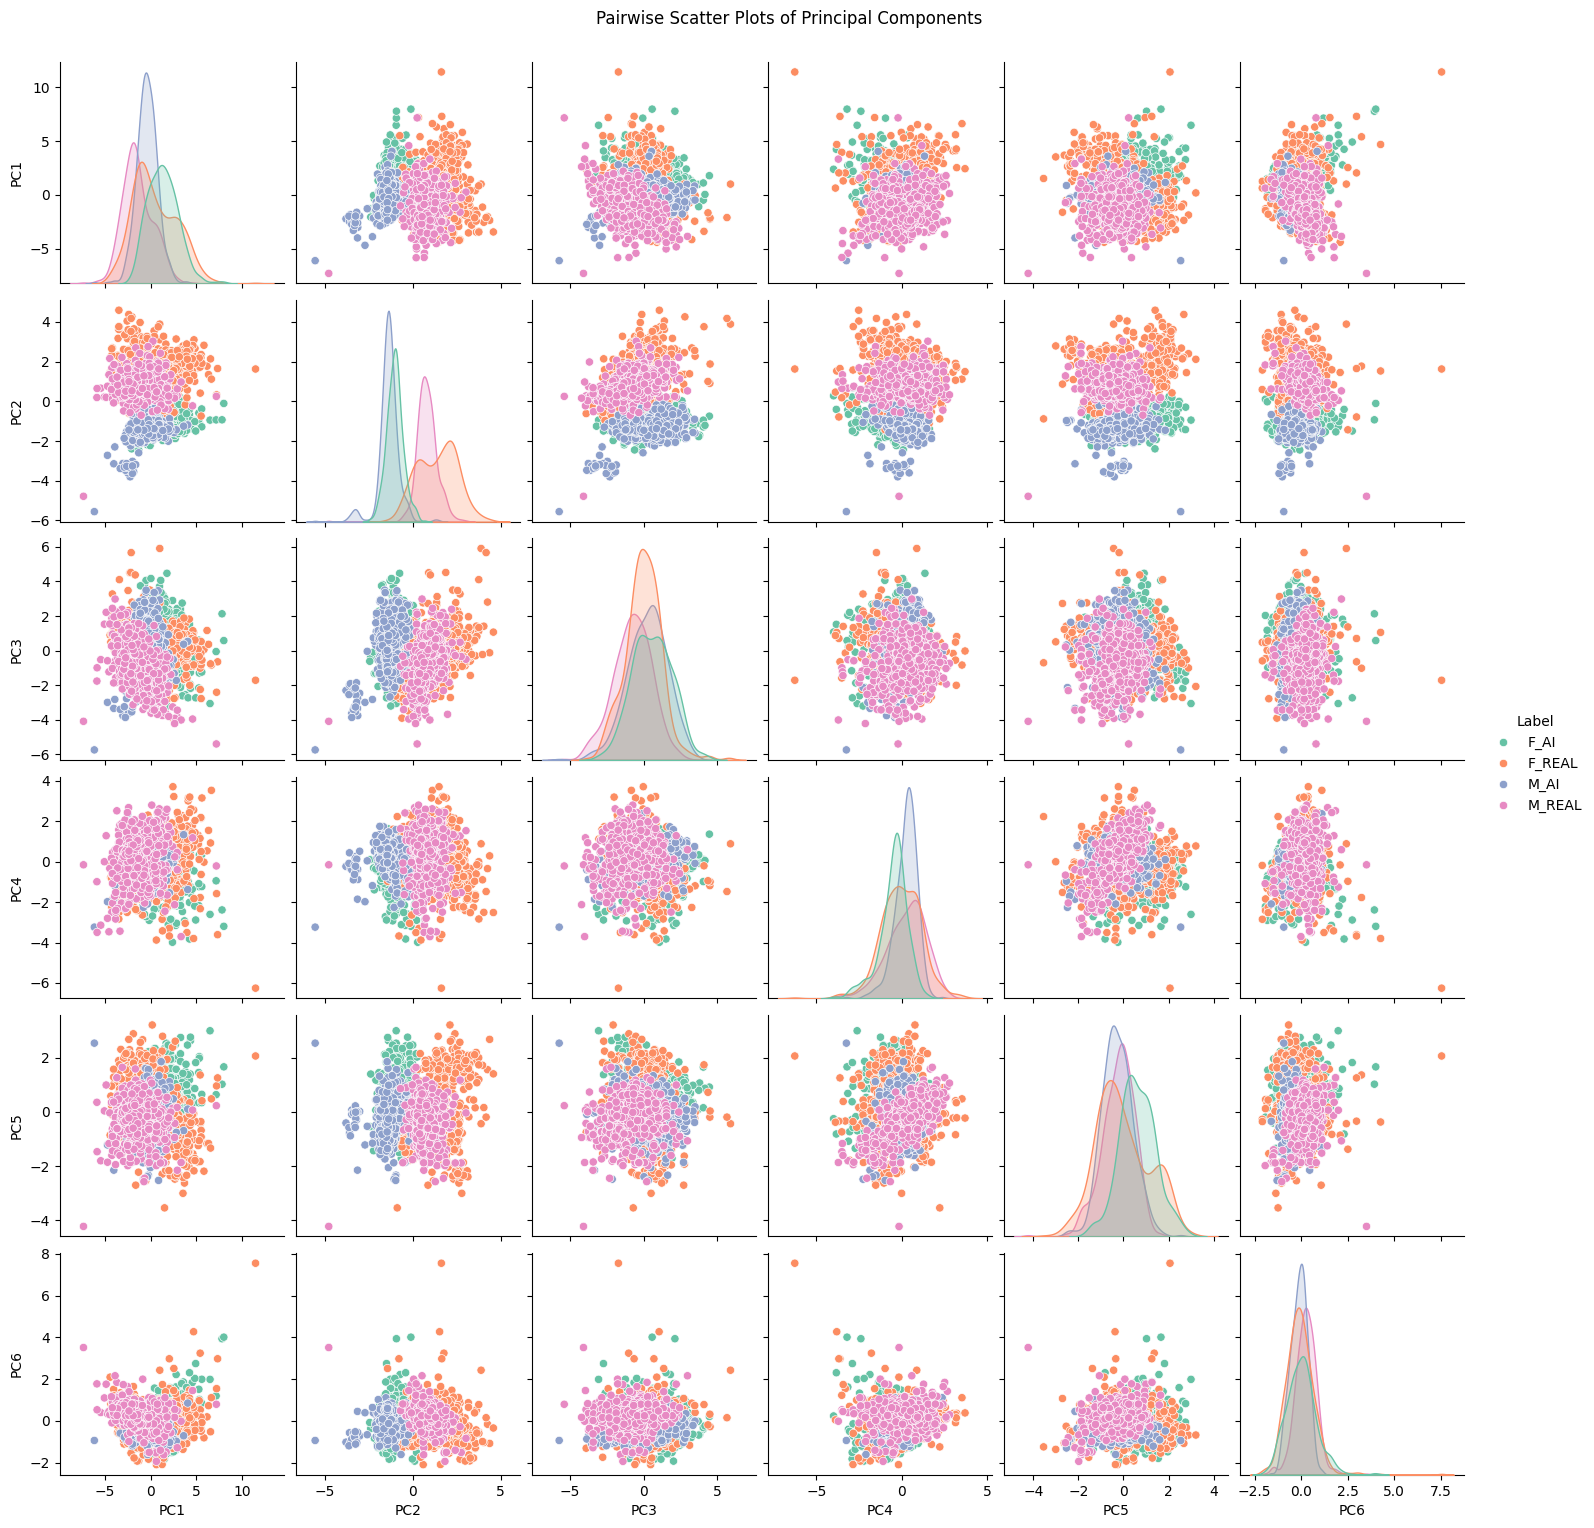

In [ ]:
X = data.drop(columns='Label')  # Features
y = data['Label']  # Labels

pca = PCA(n_components=6)
X_pca = pca.fit_transform(X)

# Convert the PCA results into a DataFrame for easier visualization
data_pca = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(6)])
data_pca['Label'] = y  # Add the label column back

# Pairplot to visualize pairwise combinations of PCs
sns.pairplot(data_pca, vars=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6"], hue="Label", palette="Set2")
plt.suptitle("Pairwise Scatter Plots of Principal Components", y=1.02)
plt.show()

In [ ]:
data_pca_cleaned = data_pca.dropna(axis=0, how='any')
data_pca = data_pca_cleaned
data_pca.isna().any().any()

False